###**Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula**

Nesse desafio utilizei os dados por ano e mês de processamento de **Taxa de Mortalidade**, que representam a razão entre a quantidade de óbitos e o número de AIH (*Autorização de Internação Hospitalar*) aprovadas, computadas como
internações, no período, multiplicada por 100.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [196]:

taxa_mortalidade_ano = pd.read_csv('https://github.com/vqrca/bootcamp_alura_aulas/blob/main/Modulo_2/taxa_mortalidade_ano_mes_processamento.csv?raw=True', 
                           encoding='ISO-8859-1',skiprows=3, sep=';', skipfooter = 12, thousands='.', decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
taxa_mortalidade_ano.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43,5.39,5.15,8.69,2.67
1,Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,2.92
2,Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37,9.16,9.36,11.33,2.89
3,Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76,2.68
4,Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89,3.18,3.60,4.61,2.15


Retirei os meses referentes a 2021, pois vou trabalhar somente com anos completos:

In [198]:
taxa_mortalidade_ano = taxa_mortalidade_ano.drop('2021/Jan', axis=1)
taxa_mortalidade_ano = taxa_mortalidade_ano.drop('2021/Fev', axis=1)
taxa_mortalidade_ano = taxa_mortalidade_ano.drop('2021/Mar', axis=1)
taxa_mortalidade_ano.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
0,Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,2.68,2.71,2.40,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43,2.67
1,Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,3.21,3.48,3.06,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,2.92
2,Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,3.11,2.95,2.81,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37,2.89
3,Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,2.54,2.38,2.48,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,2.68
4,Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.32,2.31,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89,2.15


Retirei a coluna 'Total':

In [199]:
taxa_mortalidade_ano = taxa_mortalidade_ano .drop('Total', axis=1)
taxa_mortalidade_ano.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
0,Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,3.31,2.68,2.71,2.40,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43
1,Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,2.22,3.21,3.48,3.06,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98
2,Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,3.01,3.11,2.95,2.81,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37
3,Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,3.07,2.54,2.38,2.48,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63
4,Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.36,2.32,2.31,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89


Definição do index:

In [200]:
taxa = taxa_mortalidade_ano.set_index('Unidade da Federação')
taxa

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,2.23,...,3.31,2.68,2.71,2.40,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43
Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,3.29,...,2.22,3.21,3.48,3.06,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98
Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,2.55,...,3.01,3.11,2.95,2.81,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37
Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,...,3.07,2.54,2.38,2.48,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63
Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,1.67,...,2.36,2.32,2.31,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89
Amapá,2.72,3.06,1.86,2.26,2.19,1.61,1.90,1.85,1.87,2.37,2.07,2.95,2.28,1.99,1.46,2.49,2.05,2.54,2.11,2.37,2.53,2.22,1.97,2.52,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,2.44,...,1.88,2.68,1.47,2.85,2.04,2.92,2.65,3.53,4.19,2.97,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96
Tocantins,2.12,2.75,2.67,2.39,2.01,2.65,2.63,2.43,2.19,2.04,2.38,2.60,2.13,2.94,1.96,2.05,2.37,2.31,2.65,2.62,2.55,2.90,2.43,2.10,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,2.63,...,3.10,3.26,3.60,2.90,3.65,3.13,3.60,3.25,2.85,2.48,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.67,5.39,5.28,5.58,4.83,1.98,3.13
Maranhão,0.94,1.25,1.17,1.18,1.34,1.07,1.23,1.41,1.27,1.07,0.81,1.24,1.17,1.31,1.24,1.21,1.35,1.19,1.08,1.38,1.35,1.12,1.21,1.44,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,1.48,...,2.18,2.26,2.24,2.02,2.41,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29

Deixei o dataframe transposto:

In [201]:
mensal = taxa.T
mensal.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008/Jan,1.38,1.44,1.60,1.56,1.41,2.72,2.12,0.94,1.41,1.84,2.06,2.62,2.61,1.57,0.96,1.91,3.33,2.44,3.25,3.80,2.62,3.37,3.39,2.23,2.07,2.13,4.45
2008/Fev,1.36,3.06,1.91,1.16,1.40,3.06,2.75,1.25,1.77,2.58,1.86,2.98,2.71,1.83,1.92,2.31,3.78,2.50,3.83,4.40,3.39,3.67,4.24,3.11,2.66,2.19,3.34
2008/Mar,1.04,2.01,2.11,1.27,1.53,1.86,2.67,1.17,1.83,2.70,2.64,2.70,2.79,1.89,2.82,1.96,3.88,2.82,4.32,4.43,3.08,3.52,4.19,2.55,2.39,1.85,2.75
2008/Abr,1.00,2.76,2.20,1.93,1.27,2.26,2.39,1.18,1.46,2.79,2.42,2.84,3.81,1.92,2.47,1.97,3.66,3.24,4.32,4.37,3.12,3.51,4.00,2.39,2.87,2.15,3.27
2008/Mai,1.20,2.60,1.87,1.28,1.39,2.19,2.01,1.34,1.90,2.61,2.54,2.53,2.74,1.85,1.97,1.90,3.79,2.69,4.94,4.57,3.29,3.33,3.94,3.00,2.29,1.91,2.38


Vamos trabalhar com formatação de dia:

In [202]:
from datetime import date

meses = { 
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12,
} #dicionário com os meses e seus números correspondentes, para fazer a substituição

def para_dia(ano_mes):
    ano: int = int(ano_mes[:4]) 
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes] #usando o dicionário para definir os meses
    return date(ano, mes_numero, 1) 

Datas substituídas no dataframe: 

In [203]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2008-01-01,1.38,1.44,1.60,1.56,1.41,2.72,2.12,0.94,1.41,1.84,2.06,2.62,2.61,1.57,0.96,1.91,3.33,2.44,3.25,3.80,2.62,3.37,3.39,2.23,2.07,2.13,4.45
2008-02-01,1.36,3.06,1.91,1.16,1.40,3.06,2.75,1.25,1.77,2.58,1.86,2.98,2.71,1.83,1.92,2.31,3.78,2.50,3.83,4.40,3.39,3.67,4.24,3.11,2.66,2.19,3.34
2008-03-01,1.04,2.01,2.11,1.27,1.53,1.86,2.67,1.17,1.83,2.70,2.64,2.70,2.79,1.89,2.82,1.96,3.88,2.82,4.32,4.43,3.08,3.52,4.19,2.55,2.39,1.85,2.75
2008-04-01,1.00,2.76,2.20,1.93,1.27,2.26,2.39,1.18,1.46,2.79,2.42,2.84,3.81,1.92,2.47,1.97,3.66,3.24,4.32,4.37,3.12,3.51,4.00,2.39,2.87,2.15,3.27
2008-05-01,1.20,2.60,1.87,1.28,1.39,2.19,2.01,1.34,1.90,2.61,2.54,2.53,2.74,1.85,1.97,1.90,3.79,2.69,4.94,4.57,3.29,3.33,3.94,3.00,2.29,1.91,2.38


In [204]:
mensal.index

Index([2008-01-01, 2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01,
       2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01,
       ...
       2020-03-01, 2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01, 2020-08-01,
       2020-09-01, 2020-10-01, 2020-11-01, 2020-12-01],
      dtype='object', length=156)

O index foi resetado:

In [207]:
mensal.reset_index()

Unidade da Federação,index,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,2008-01-01,1.38,1.44,1.60,1.56,1.41,2.72,2.12,0.94,1.41,1.84,2.06,2.62,2.61,1.57,0.96,1.91,3.33,2.44,3.25,3.80,2.62,3.37,3.39,2.23,2.07,2.13,4.45
1,2008-02-01,1.36,3.06,1.91,1.16,1.40,3.06,2.75,1.25,1.77,2.58,1.86,2.98,2.71,1.83,1.92,2.31,3.78,2.50,3.83,4.40,3.39,3.67,4.24,3.11,2.66,2.19,3.34
2,2008-03-01,1.04,2.01,2.11,1.27,1.53,1.86,2.67,1.17,1.83,2.70,2.64,2.70,2.79,1.89,2.82,1.96,3.88,2.82,4.32,4.43,3.08,3.52,4.19,2.55,2.39,1.85,2.75
3,2008-04-01,1.00,2.76,2.20,1.93,1.27,2.26,2.39,1.18,1.46,2.79,2.42,2.84,3.81,1.92,2.47,1.97,3.66,3.24,4.32,4.37,3.12,3.51,4.00,2.39,2.87,2.15,3.27
4,2008-05-01,1.20,2.60,1.87,1.28,1.39,2.19,2.01,1.34,1.90,2.61,2.54,2.53,2.74,1.85,1.97,1.90,3.79,2.69,4.94,4.57,3.29,3.33,3.94,3.00,2.29,1.91,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2020-08-01,5.62,4.32,4.61,2.60,4.55,4.85,5.28,3.60,6.12,6.30,5.84,7.78,6.21,5.99,8.12,5.87,6.60,6.64,9.32,7.52,6.51,6.70,7.43,5.90,6.21,6.75,5.95
152,2020-09-01,4.58,3.94,4.40,3.49,3.32,2.72,5.58,3.31,4.48,5.12,4.87,6.78,5.78,4.93,8.69,5.10,6.37,5.90,9.19,6.94,5.75,6.00,7.16,6.84,5.87,5.96,4.33
153,2020-10-01,3.59,4.09,3.95,3.27,2.75,3.21,4.83,3.28,4.47,5.21,4.40,7.54,4.46,4.95,7.15,4.67,6.43,5.14,8.15,6.71,5.40,5.44,6.93,6.62,5.39,6.07,3.97
154,2020-11-01,2.94,3.29,4.74,3.93,2.82,2.63,1.98,3.24,3.67,4.66,4.81,5.93,5.93,4.52,6.86,4.50,5.77,5.35,9.29,6.06,5.41,5.08,6.40,5.70,5.24,5.30,3.83


Agora o que eu vamos fazer é o seguinte: alterar nossa tabela para conseguir pegar  várias variáveis, que são São Paulo, Minas Gerais, Paraná, Rio Grande do Sul etc., e transformá-las em linhas extras. Se antes eu tinha uma única linha, agora eu vou ter 27 linhas para cada um desses.

O que eu tenho que falar é que eu quero derreter a minha tela, eu quero pegá-la e quebrá-la para baixo. Isso é feito com `melt()` e quando você faz um melt, você tem que falar qual é a coluna que você não quer derreter, que você quer manter do jeito que está. Vamos pensar? A coluna VALOR nem existe, a coluna ESTADO' também não existe, só existe a coluna MES, que se chama index, então `id_vars` é quem identifica, as colunas que identificam unicamente alguma coisa é só `index`:

In [208]:
mensal.reset_index().melt(id_vars=['index'])

,index,Unidade da Federação,value
0,2008-01-01,Rondônia,1.38
1,2008-02-01,Rondônia,1.36
2,2008-03-01,Rondônia,1.04
3,2008-04-01,Rondônia,1.00
4,2008-05-01,Rondônia,1.20
...,...,...,...
4207,2020-08-01,Distrito Federal,5.95
4208,2020-09-01,Distrito Federal,4.33
4209,2020-10-01,Distrito Federal,3.97
4210,2020-11-01,Distrito Federal,3.83


Para garantir a ordem dessas colunas:

In [209]:
mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)

,index,Unidade da Federação,value
0,2008-01-01,Rondônia,1.38
1,2008-02-01,Rondônia,1.36
2,2008-03-01,Rondônia,1.04
3,2008-04-01,Rondônia,1.00
4,2008-05-01,Rondônia,1.20
...,...,...,...
4207,2020-08-01,Distrito Federal,5.95
4208,2020-09-01,Distrito Federal,4.33
4209,2020-10-01,Distrito Federal,3.97
4210,2020-11-01,Distrito Federal,3.83


Agora vamos definir o nome das colunas:

In [210]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano', 'uf', 'taxa_mortalidade']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,taxa_mortalidade
0,2008-01-01,Rondônia,1.38
1,2008-02-01,Rondônia,1.36
2,2008-03-01,Rondônia,1.04
3,2008-04-01,Rondônia,1.00
4,2008-05-01,Rondônia,1.20


Criação da coluna mês e coluna ano:

In [212]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,taxa_mortalidade,mes,ano
0,2008-01-01,Rondônia,1.38,1,2008
1,2008-02-01,Rondônia,1.36,2,2008
2,2008-03-01,Rondônia,1.04,3,2008
3,2008-04-01,Rondônia,1.00,4,2008
4,2008-05-01,Rondônia,1.20,5,2008


E se quisermos dividir pelo número de dias daquele mês?
podemos criar um dicionário para isso:

In [215]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

o `.map()` funciona não só para uma função, funciona para um dicionário:

In [216]:
mensal_aberto['mes'].map(dias_por_mes)

0       31
1       28
2       31
3       30
4       31
        ..
4207    31
4208    30
4209    31
4210    30
4211    31
Name: mes, Length: 4212, dtype: int64

Se eu quiser saber a taxa de mortalidade por mês:

In [217]:
mensal_aberto['taxa_mortalidade'] / mensal_aberto['mes'].map(dias_por_mes)

0       0.044516
1       0.048571
2       0.033548
3       0.033333
4       0.038710
          ...   
4207    0.191935
4208    0.144333
4209    0.128065
4210    0.127667
4211    0.111290
Length: 4212, dtype: float64

In [218]:
mensal_aberto['taxa_diaria'] = mensal_aberto['taxa_mortalidade'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,taxa_mortalidade,mes,ano,taxa_diaria
0,2008-01-01,Rondônia,1.38,1,2008,0.044516
1,2008-02-01,Rondônia,1.36,2,2008,0.048571
2,2008-03-01,Rondônia,1.04,3,2008,0.033548
3,2008-04-01,Rondônia,1.00,4,2008,0.033333
4,2008-05-01,Rondônia,1.20,5,2008,0.038710


Agora vou escolher apenas alguns estados para analisar:

In [231]:
estados = ["Rio de Janeiro", "São Paulo", "Amazonas"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index() # índice não é coluna, por isso dar um reset index
por_ano_dos_estados.head()

,uf,ano,taxa_mortalidade,mes,taxa_diaria
0,Amazonas,2008,21.46,78,0.706472
1,Amazonas,2009,24.25,78,0.796974
2,Amazonas,2010,23.75,78,0.781053
3,Amazonas,2011,28.63,78,0.943634
4,Amazonas,2012,29.04,78,0.955891


Vou fazer um cálculo para ter a taxa de mortalidade anual de cada Estado:

In [234]:
por_ano_dos_estados['taxa_anual'] = por_ano_dos_estados['taxa_mortalidade']/12
por_ano_dos_estados

,uf,ano,taxa_mortalidade,mes,taxa_diaria,taxa_anual
0,Amazonas,2008,21.46,78,0.706472,1.788333
1,Amazonas,2009,24.25,78,0.796974,2.020833
2,Amazonas,2010,23.75,78,0.781053,1.979167
3,Amazonas,2011,28.63,78,0.943634,2.385833
4,Amazonas,2012,29.04,78,0.955891,2.420000
5,Amazonas,2013,27.05,78,0.891250,2.254167
6,Amazonas,2014,24.62,78,0.809480,2.051667
7,Amazonas,2015,28.98,78,0.953821,2.415000
8,Amazonas,2016,36.50,78,1.200597,3.041667
9,Amazonas,2017,36.34,78,1.196246,3.028333


Visualização gráfica, após o groupby:

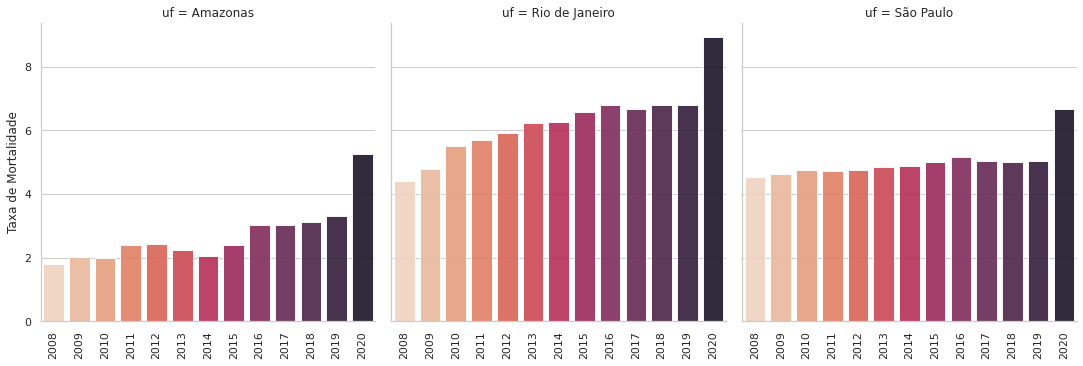

In [302]:
sns.set_theme(style="whitegrid")
ax = sns.catplot(data=por_ano_dos_estados, y="taxa_anual", x="ano", kind="bar", col="uf", palette="rocket_r", alpha=.9, height=5, orient='v')
ax.despine(left=False)
ax.set_axis_labels("", "Taxa de Mortalidade", fontsize=12)
ax.set_xticklabels(rotation=90)
plt.show()


Os mesmos estados representados em um gráfico de linhas:

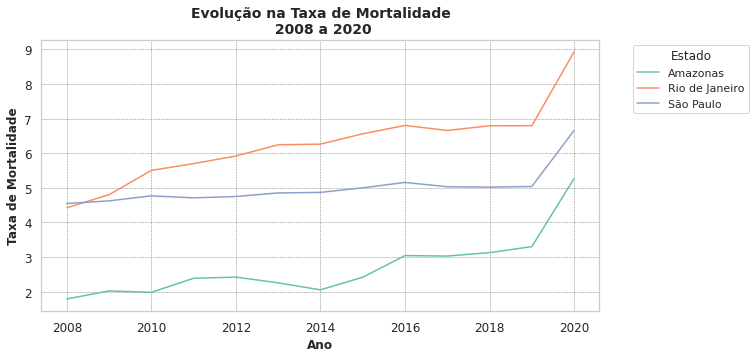

In [320]:
fig = plt.subplots(figsize=(10,5)) 
ax = sns.lineplot(data=por_ano_dos_estados, x="ano", y="taxa_anual", hue="uf", palette='Set2')
plt.title('Evolução na Taxa de Mortalidade\n 2008 a 2020', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

Se quisermos plotar os três estados juntos em um gráfico de barras:

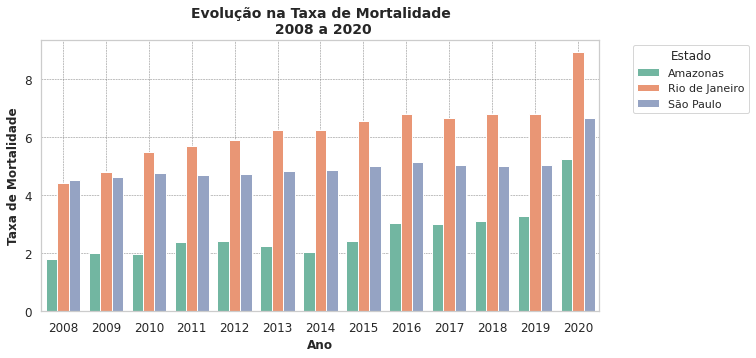

In [323]:
fig = plt.subplots(figsize=(10,5)) 
sns.barplot(data=por_ano_dos_estados, x="ano", y="taxa_anual", hue="uf", palette='Set2')
plt.title('Evolução na Taxa de Mortalidade\n 2008 a 2020', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Taxa de Mortalidade', weight='bold', fontsize=12)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)